<a href="https://colab.research.google.com/github/heraltmichal/zsu/blob/main/fml_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning - Exercise 8
Goal of the excercise is to learn how to use Scikit-learn library for a classification tasks and evaluate the performance of the proposed models.

![meme04](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_04.jpg?raw=true)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

## Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Useful links
* Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Metrics https://scikit-learn.org/stable/modules/model_evaluation.html
* K-Fold CV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
* Random forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# 🎯 What is our goal for this dataset?
* 🔎 What are the input features?
* 🔎 What is the output?
* 🔎 What should the model do?

## Load the titanic.csv dataset first

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 📊 Each task starts with basic exploration of the data

## How many passangers survived?
* Are the labels balanced?

In [3]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


# 💡 We need to pre-process the data first before training any ML model
* We want to use only numerical attributes as a model features
* Certain attributes need to be dropped and some of them can be encoded

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_01.jpg?raw=true)

## Which features could be encoded and which methods would you use?

In [4]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [5]:
df.describe(include=np.number)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## How many values are missing in the individual attributes?

In [6]:
df.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0
Fare,0


# 🔎 Which features would you drop and why?

## Let's drop Name and Ticket features - these have no use for us now

In [7]:
df = df.drop(['Name', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


# 🚤 Extract the deck identifier from the Cabin feature
* 💡 A = top deck, G = lowest deck
  
1) Change type to string
   
2) Filter the first letter using *apply* function
   
3) If the value is *nan* use *U* value as an replacement - this will mark the passangers with missing Cabin value
   
4) Replace the T value with A

In [8]:
df.Cabin = df.Cabin.astype(str).apply(lambda x: x[0] if x != 'nan' else 'U').replace({'T': 'A'})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,U,S
2,1,1,female,38.0,1,0,71.2833,C,C
3,1,3,female,26.0,0,0,7.9250,U,S
4,1,1,female,35.0,1,0,53.1000,C,S
5,0,3,male,35.0,0,0,8.0500,U,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,U,S
888,1,1,female,19.0,0,0,30.0000,B,S
889,0,3,female,NaN,1,2,23.4500,U,S


In [9]:
df.Cabin.value_counts()

,count
Cabin,
U,687
C,59
B,47
D,33
E,32
A,16
F,13
G,4


# ⚠ The Age feature is tricky, we have multiple solutions for dealing with missing values, e.g.:

1) Drop the feature

2) Take the mean/median value to replace the missing value

3) Take a random list of ages that maintains the original statistical summary values

4) Use a model to predict values based on the existing values

## We will use the second option ✌

## Check the boxplot *before* and *after* the replacement
* 🔎 Is there any change?

Text(0.5, 1.0, 'Before')

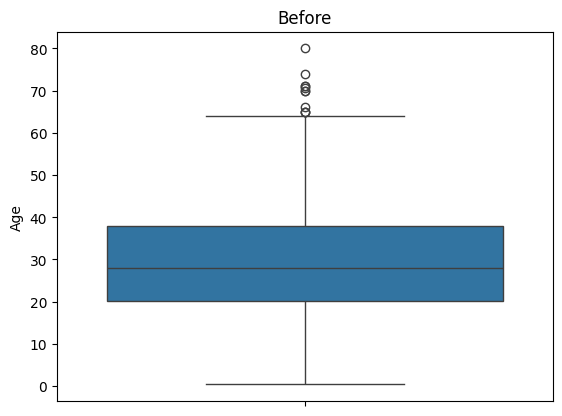

In [10]:
sns.boxplot(y=df.Age).set_title('Before')

In [11]:
df.Age = df.Age.fillna(df.Age.mean())

Text(0.5, 1.0, 'After')

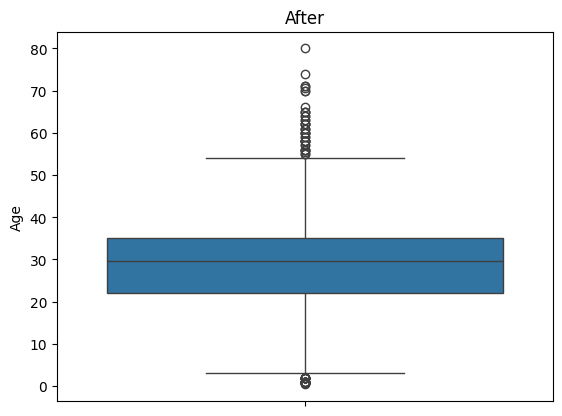

In [12]:
sns.boxplot(y=df.Age).set_title('After')

## Two passangers don't have the *Embarked* feature filled - we can drop these two rows

In [13]:
df = df.dropna()

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,U,S
2,1,1,female,38.000000,1,0,71.2833,C,C
3,1,3,female,26.000000,0,0,7.9250,U,S
4,1,1,female,35.000000,1,0,53.1000,C,S
5,0,3,male,35.000000,0,0,8.0500,U,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,U,S
888,1,1,female,19.000000,0,0,30.0000,B,S
889,0,3,female,29.699118,1,2,23.4500,U,S


## The last step of the pre-processing pipeline is to encode *Sex*, *Cabin* and *Embarked* features 👊
* We will use one-hot encoding for *Sex* and *Embarked* and Ordinal encoding for Cabin
* Specify the encoding scheme for the ordinal encoding using an array in a form ['first', 'second', 'third', ...]

In [15]:
cabin_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']
enc_cabin = OrdinalEncoder(categories=[cabin_categories])
enc_cabin.fit_transform(df[['Cabin']])[:, 0][:10]

array([7., 2., 7., 2., 7., 7., 4., 7., 7., 7.])

ORDINAL protoze je DULEZITE PORADI

## Encode *Cabin* feature

In [16]:
df.loc[:, 'Cabin'] = enc_cabin.fit_transform(df[['Cabin']])[:, 0]

## Encode *Sex* feature

In [17]:
sex_categories = ['male', 'female']
enc_sex = OrdinalEncoder(categories=[sex_categories])
df.loc[:, 'Sex'] = enc_sex.fit_transform(df[['Sex']])[:, 0]

## Check the results

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0.0,22.0,1,0,7.2500,7.0,S
2,1,1,1.0,38.0,1,0,71.2833,2.0,C
3,1,3,1.0,26.0,0,0,7.9250,7.0,S
4,1,1,1.0,35.0,1,0,53.1000,2.0,S
5,0,3,0.0,35.0,0,0,8.0500,7.0,S


## The final step is to encode the *Embarked* using a one-hot encoding

In [19]:
pd.get_dummies(df['Embarked'], prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,True
889,False,False,True


## Concat the original `df` with a `pd.get_dummies` encoding result

In [20]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1).drop('Embarked', axis=1)

# The dataset is finally ready for the machine learning model training! 😍
* Let's take a one last look if everything is OK and we are good to go!

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,0.0,22.000000,1,0,7.2500,7.0,False,False,True
2,1,1,1.0,38.000000,1,0,71.2833,2.0,True,False,False
3,1,3,1.0,26.000000,0,0,7.9250,7.0,False,False,True
4,1,1,1.0,35.000000,1,0,53.1000,2.0,False,False,True
5,0,3,0.0,35.000000,0,0,8.0500,7.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.0,27.000000,0,0,13.0000,7.0,False,False,True
888,1,1,1.0,19.000000,0,0,30.0000,1.0,False,False,True
889,0,3,1.0,29.699118,1,2,23.4500,7.0,False,False,True


# 🚀 Let's start with splitting the data into the input and output part
* Usually named as a *X* and *y* variables
* What is the input and output?

In [22]:
X, y = df.loc[:, df.columns != 'Survived'], df.loc[:, 'Survived']

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0.0,22.0,1,0,7.2500,7.0,False,False,True
2,1,1.0,38.0,1,0,71.2833,2.0,True,False,False
3,3,1.0,26.0,0,0,7.9250,7.0,False,False,True
4,1,1.0,35.0,1,0,53.1000,2.0,False,False,True
5,3,0.0,35.0,0,0,8.0500,7.0,False,False,True


In [24]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


# We usually want to split the data into two sets called `train` and `test`
* 🔎 Why do we do that?
* Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 10), (178, 10), (711,), (178,))

# 🌳 Create the Decision tree classifier instance

In [26]:
clf = DecisionTreeClassifier()

## Use `fit()` method for training the classifier

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Lets use trained model for the prediction of the survival of the passenger
* 💡 Get predictions via the `predict()` method

In [29]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

# How can we evaluate our model?
* There are multiple metrics used: Accuracy, Recall, Precision, F1-Score, etc.
* 💡 Very useful is also creating a confusion matrix

# 🔎 How can we select the metric?
* 💡 Accuracy and F1-Score are the most universal metrics

## 🔎 When is **Accuracy** unsuitable?

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_02.jpg?raw=true)

# Take a look at this [article](https://builtin.com/data-science/precision-and-recall) and [wiki](https://en.wikipedia.org/wiki/Precision_and_recall) about precision and recall
* 💡 Beware the fact that as we increase precision, we decrease recall and vice-versa.

* **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.
    * The question that precision answer is of all passengers that labeled as survived, how many actually survived?
    * High precision relates to the low false positive rate.


* **Recall** is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
    * The question recall answers is: Of all the passengers that truly survived, how many did we label?

* **F1 Score** is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
    * Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
    * 💡 **F1 works best if false positives and false negatives have similar cost**
        * If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

$ConfMatrix = \begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}$

## Let's take a look at an example:
$|1| = 10$

$|0| = 90$

$M = \begin{bmatrix}
1 & 9\\
0 & 90
\end{bmatrix}$

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN} = \frac{1+90}{1+90+0+9} = \frac{91}{100} = 0.91$

$Precision = \frac{TP}{TP+FP} = \frac{1}{1+0} = 1$

$Recall = \frac{TP}{TP+FN} = \frac{1}{1+9} = \frac{1}{10} = 0.1$

$F1-Score = 2 \cdot \frac{Precision \cdot Recall}{Precision+Recall} = 2 \cdot \frac{1 \cdot 0.1}{1+0.1} = 2 \cdot \frac{0.1}{1.1} = 0.09$

## What does the confusion matrix tell us?
* 🔎 Where do we find true positives, false positives, etc?

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

# 🚀 We can compute any metric that we wish

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)

# Can we improve our evaluation process?
* Lets try **cross-validation** process for the decision tree model
    * https://scikit-learn.org/stable/modules/cross_validation.html
* **What is the difference between Pure and Stratified K-Fold?**
    * 💡 Take a look at the survival ratio

In [31]:
skf = KFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf = DecisionTreeClassifier(random_state=13)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  scores.append(f1_score(y_test, y_pred))
  print(f'Survival ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; Survival ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')

scores

Survival ratio in train set: 0.4; Survival ratio in test set: 0.33
Survival ratio in train set: 0.37; Survival ratio in test set: 0.44
Survival ratio in train set: 0.38; Survival ratio in test set: 0.39
Survival ratio in train set: 0.38; Survival ratio in test set: 0.4
Survival ratio in train set: 0.39; Survival ratio in test set: 0.35


[0.6666666666666666,
 0.7284768211920529,
 0.7407407407407407,
 0.6466165413533834,
 0.7633587786259542]

## After the k-Fold CV is complete we usually want to compute statistics from the desired metric...

In [32]:
np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.7091719097157595),
 np.float64(0.6466165413533834),
 np.float64(0.7633587786259542))

## ... or create a boxplot out of it 🔬

<Axes: >

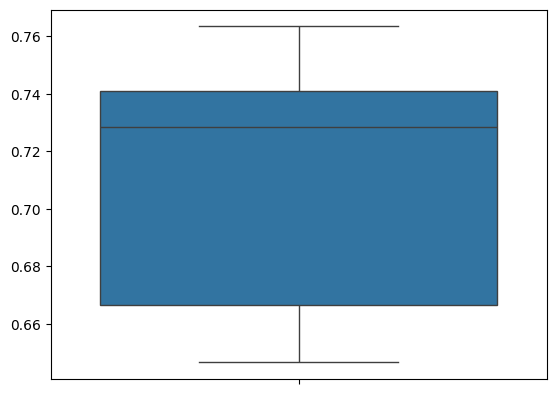

In [33]:
sns.boxplot(y=scores)

In [34]:
skf = StratifiedKFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    print(f'Survival ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; Survival ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')

scores

Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38


[0.6521739130434783,
 0.7246376811594203,
 0.732824427480916,
 0.703125,
 0.7659574468085106]

In [35]:
np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.715743693698465),
 np.float64(0.6521739130434783),
 np.float64(0.7659574468085106))

<Axes: >

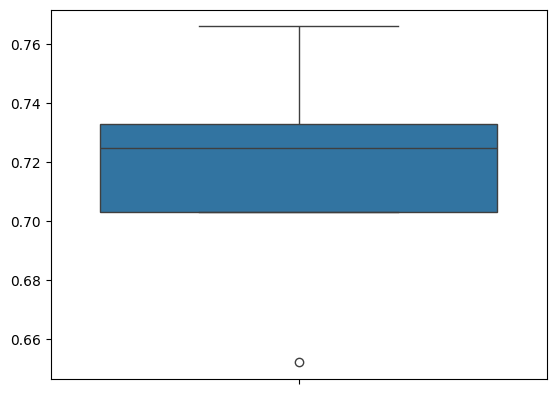

In [36]:
sns.boxplot(y=scores)

# 📊 ML algorithms usually have hyper-parameters which change the behaviour of the model
* It is usually a good idea to check documentation 😊
    * https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* For the *DecisionTreeClassifier* a `max_depth` or `min_samples_split` are pretty important

* 🎯 The goal of the hyper-parameter tuning is to investigate the effect of the parameters on the model and ideally make the model better with setting the right parameters
    * Some models are more sensitive to parameters settings

## 🚀 Let's tune the `max_depth` first

In [38]:
scores_global = []
for x in np.arange(2, 25):
  skf = KFold(n_splits=5)
  scores = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = x, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
  scores_global.append((x, np.mean(scores)))


scores_global[:10]

[(np.int64(2), np.float64(0.6462251916519389)),
 (np.int64(3), np.float64(0.7169111226750035)),
 (np.int64(4), np.float64(0.7346256441985827)),
 (np.int64(5), np.float64(0.7369598084778877)),
 (np.int64(6), np.float64(0.7305392066655948)),
 (np.int64(7), np.float64(0.7272241825755625)),
 (np.int64(8), np.float64(0.7394504891213879)),
 (np.int64(9), np.float64(0.7276478149673157)),
 (np.int64(10), np.float64(0.7084531524268604)),
 (np.int64(11), np.float64(0.7284330616238063))]

In [39]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
18,20,0.706926
19,21,0.709172
20,22,0.709172
21,23,0.709172
22,24,0.709172


## Now we can plot the data
* 🔎 Which setting is the best?

<Axes: xlabel='max_depth', ylabel='f1'>

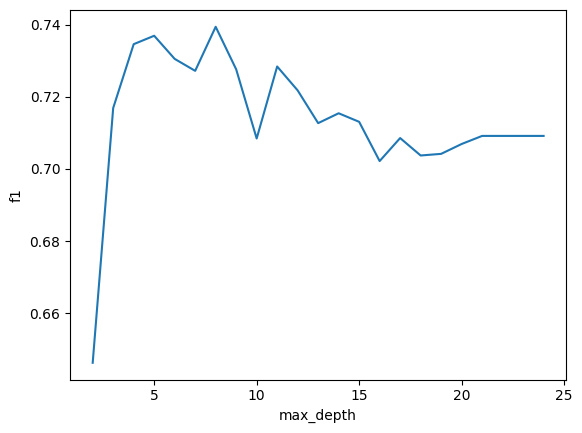

In [40]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [41]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
6,8,0.739450
3,5,0.736960
2,4,0.734626
4,6,0.730539
9,11,0.728433


## 🚀 Now we can continue with `min_samples_split`

In [42]:
scores_global = []
for x in np.arange(2, 50):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(np.int64(2), np.float64(0.7091719097157595)),
 (np.int64(3), np.float64(0.7142369834462678)),
 (np.int64(4), np.float64(0.7108406388472696)),
 (np.int64(5), np.float64(0.7083227097386389)),
 (np.int64(6), np.float64(0.7138561984721277)),
 (np.int64(7), np.float64(0.7122655728739403)),
 (np.int64(8), np.float64(0.7163627300080787)),
 (np.int64(9), np.float64(0.7097320241148454)),
 (np.int64(10), np.float64(0.7111986964817153)),
 (np.int64(11), np.float64(0.7209709373787417))]

In [43]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
38,40,0.701833
39,41,0.700003
40,42,0.698750
41,43,0.696845
42,44,0.696845
43,45,0.697736
44,46,0.695761
45,47,0.696535
46,48,0.702056
47,49,0.699978


In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

### Which setting is the best?

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

## 🎯 So now we can try the combination of the best parameter-wise settings

In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 12, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

### 🔎 Is the model now better than the *default* one?

## Alternatively we can tune both parameters at once 😇

In [ ]:
scores_global = []
for d in range(2, 25):
    for split in range(2, 50):
        skf = KFold(n_splits=5)
        scores = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = DecisionTreeClassifier(max_depth = d, min_samples_split = split, random_state = 13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            scores.append(f1_score(y_test, y_pred))
        scores_global.append((d, split, np.mean(scores)))

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'min_samples_split', 'f1'])
df_res.sort_values(by='f1', ascending=False).head(5)

## And try the best combination again 😊
* 💡You don't have to write these codes by hand, sklearn already provides function for it
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 11, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

# ✅ Task (2p)
* Take a look at the different models in the sklearn
    * https://scikit-learn.org/stable/supervised_learning.html
* Choose one model that you want to try, check how it works and what hyperparameters are the most important
    * You know some of them from the the lectures but you can also check online tutorials, blogs or YouTube 🙂
* Use the model in default settings
* Tune at least one of the hyper-parameters and compare the model proposed during the lecture and the one you just created
    * Beat the default `DecisionTreeClassifier`

* **Describe the insight you got from the experiments with a few sentences in a Markdown cell**
    * Mention what parameters you tuned and if the hyperparameter tuning helped!
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_03.jpg?raw=true)